In [1]:
import git
from pathlib import Path
import os
from matplotlib import colors

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
np.random.seed(0)

In [2]:
SAVE_FIGS = True
plots_path = os.path.join(ROOT_DIR, "publication", "paper", "draft_plots")
NUM_COMPONENTS_SMOOTH = 3000

In [3]:
# from matplotlib.colors import ListedColormap, LogNorm
# import numpy as np
# import matplotlib.pyplot as plt

# # Set the split ratio (e.g., 0.25 means 25% viridis_r, 75% magma_r)
# split_ratio = 0.25
# n_total = 256
# n1 = int(n_total * split_ratio)
# n2 = n_total - n1

# # Get color arrays from the colormaps
# viridis_r = plt.get_cmap('viridis_r')(np.linspace(0, 0.9, n1))
# magma_r = plt.get_cmap('magma_r')(np.linspace(0.75, 1, n2))

# # Concatenate the color arrays
# combined_colors = np.vstack([viridis_r, magma_r])
# custom_cmap = ListedColormap(combined_colors)
# def color_fn(variance):
#         return custom_cmap(norm(variance))

# # Create a colorbar for demonstration
# fig, ax = plt.subplots(figsize=(1.5, 8))
# norm = LogNorm(vmin=0.1, vmax=1e7)
# cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=custom_cmap), cax=ax)
# cb.set_label('Custom Combined Colorbar')
# plt.show()

In [4]:
# from matplotlib.colors import ListedColormap, LogNorm
# import numpy as np
# import matplotlib.pyplot as plt

# # Set the split ratio (e.g., 0.25 means 25% viridis_r, 75% magma_r)
# split_ratio = 0.2
# n_total = 256
# n1 = int(n_total * split_ratio)
# n2 = n_total - n1

# # Get color arrays from the colormaps
# viridis_r = plt.get_cmap('viridis_r')(np.linspace(0, 0.9, n1))
# magma_r = plt.get_cmap('magma_r')(np.linspace(0.75, 1, n2))

# # Concatenate the color arrays
# combined_colors = np.vstack([viridis_r, magma_r])
# custom_cmap = ListedColormap(combined_colors)
# def color_fn(variance):
#         return custom_cmap(norm(variance))

# # Create a colorbar for demonstration
# fig, ax = plt.subplots(figsize=(1.5, 8))
# norm = LogNorm(vmin=0.1, vmax=1e9)
# cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=custom_cmap), cax=ax)
# cb.set_label('Custom Combined Colorbar')
# plt.show()

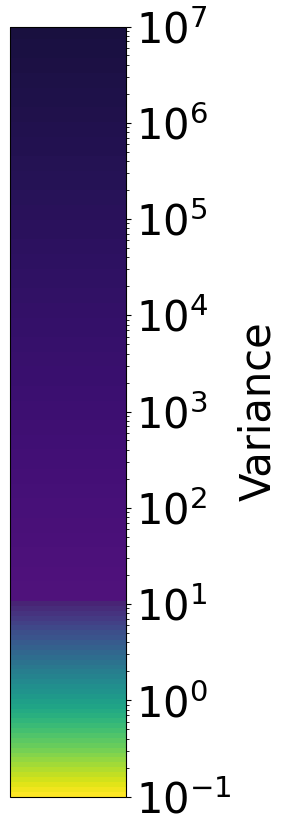

In [5]:
from matplotlib.colors import ListedColormap, LogNorm
import numpy as np
import matplotlib.pyplot as plt

# Set the split ratio (e.g., 0.25 means 25% viridis_r, 75% magma_r)
split_ratio = 0.16
n_total = 256
n1 = int(n_total * split_ratio)
n2 = n_total - n1

# Get color arrays from the colormaps
viridis_r = plt.get_cmap('viridis_r')(np.linspace(0, 0.9, n1))
magma_r = plt.get_cmap('magma_r')(np.linspace(0.75, 1, n2))

# Concatenate the color arrays
combined_colors = np.vstack([viridis_r, magma_r])
custom_cmap = ListedColormap(combined_colors)
def color_fn(variance):
        return custom_cmap(norm(variance))

# Create a colorbar for demonstration
fig, ax = plt.subplots(figsize=(1.5, 10))
norm = LogNorm(vmin=0.1, vmax=1e12)
cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=custom_cmap), cax=ax)
cb.set_label('Variance', fontsize=30)
cb.ax.tick_params(labelsize=30)
plt.ylim((1e-1, 1e7))
plt.show()
if SAVE_FIGS:
        save_path = os.path.join(plots_path, f"varianceColorBar.jpg")
        fig.savefig(save_path, dpi=600, bbox_inches='tight')

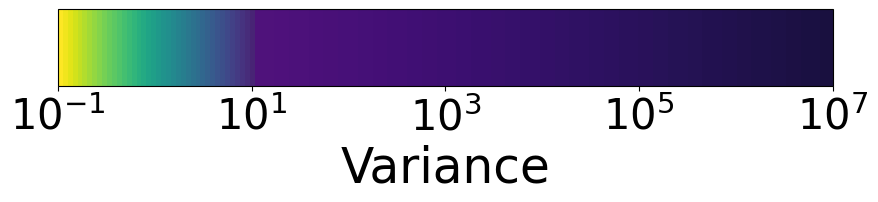

In [6]:
# Create a horizontal colorbar with reduced width
fig, ax = plt.subplots(figsize=(10, 1))
norm = LogNorm(vmin=0.1, vmax=1e12)
cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=custom_cmap), cax=ax, orientation='horizontal')
cb.set_label('Variance', fontsize=35)
cb.ax.tick_params(labelsize=30)
plt.xlim((1e-1, 1e7))
plt.show()

if SAVE_FIGS:
    save_path = os.path.join(plots_path, f"varianceColorBar_horizontal.jpg")
    fig.savefig(save_path, dpi=600, bbox_inches='tight')


In [7]:
def plot_pdf_components_both(r, eta, scale, components = 10, mode = "equal", color_fn = None, custom_var = None, varlim = None, xlim = None, lin_lim = None, log_lim = None, debug = True, prior_pdf = None, title = None, edgecolor = 'black'):
    beta = (eta + 1.5) / r
    
    if mode == "equal":
        x = np.linspace(0, 1, components+2)[1:-1][::-1]  # Exclude 0 and 1 to avoid singularities
        vars = stats.gengamma(a=beta, c=r, scale=scale).ppf(x)
        weights = np.ones(components) / components
    elif mode == "variance":
        if custom_var is None and varlim is None:
            raise ValueError("Either custom_var or varlim must be provided for 'variance' mode.")
        if custom_var is not None:
            vars = np.array(custom_var)
        elif varlim is not None:
            if varlim[2] == "linear":
                vars = np.linspace(varlim[0], varlim[1], components)[::-1]
            elif varlim[2] == "log":
                vars = np.logspace(np.log10(varlim[0]), np.log10(varlim[1]), components)[::-1]
        weights = stats.gengamma(a = beta, c = r, scale=scale).cdf(vars[::-1])
        weights = np.diff(weights, prepend=0)[::-1]
        print(sum(weights))  # Convert cumulative weights to densities
        print(weights)
        
    if prior_pdf is None:
        xs, genGamma_prior = compute_prior_pdf(r=r, eta=eta, scale=scale, n_samples=2000, debug=debug)
    else:
        xs = np.linspace(-5, 5, 1000)
        genGamma_prior = prior_pdf

    means = np.zeros(components)
    print(vars)
    norm_pdfs = np.array([stats.norm.pdf(xs, loc=mean, scale=np.sqrt(var)) for mean, var in zip(means, vars)])
    if color_fn is None:
        cmap = plt.cm.viridis(np.linspace(0, 1, components))
    else:
        cmap = [color_fn(var) for var in vars]  # Create a colormap based on the variances

    # Create side-by-side subplots
    fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharex=True, constrained_layout=True)

    for ax, yscale in zip(axs, ['linear', 'log']):
    # Plot stackplot
        ax.stackplot(
            xs,
            *(norm_pdfs * weights[:, None]),
            colors=cmap,
            labels=[f'Component {i+1} (var={vars[i]:.2f}), (wt={weights[i]:.2f})' for i in range(components)]
        )
        # Overlay the GenGamma prior
        ax.plot(xs, genGamma_prior(xs), label='GenGamma Prior', color='black', linestyle='--', linewidth=2)

        # Set styles
        for polygon in ax.collections:
            polygon.set_edgecolor(edgecolor)
        ax.set_xlabel(r'$x$')
        ax.set_yscale(yscale)
        ax.tick_params(axis='both', which='major', labelsize=25)
        ax.tick_params(axis='both', which='minor', labelsize=25)
        
        ax.xaxis.label.set_fontsize(25)
        ax.yaxis.label.set_fontsize(25)

    axs[0].set_ylabel(r'$\pi (x)$', fontsize=25)

    # Shared title and colorbar
    if xlim is not None:
        axs[0].set_xlim(xlim)
        axs[1].set_xlim(xlim)
    if lin_lim is not None:
        axs[0].set_ylim(lin_lim)
    if log_lim is not None:
        axs[1].set_ylim(log_lim)

    if title is None:
        title = f'Scale Mixture of Normals with GenGamma Prior\nr={r}, eta={eta}, scale={scale}, components={components}'
    fig.suptitle(title, fontsize=30)



    # Add colorbar outside the plots
    #sm = plt.cm.ScalarMappable(
        #cmap=plt.cm.viridis_r,  # reversed colormap
        #norm=colors.Normalize(vmin=vars.min(), vmax=vars.max())
    #)  
    #sm.set_array([])
    #cbar = fig.colorbar(sm, ax=axs.ravel().tolist(), location='right', pad=0.02, aspect=40)
    #cbar.set_label('Variance')

    # Only show legend for the first axis, outside the plot
    handles, labels = axs[0].get_legend_handles_labels()
    # Remove duplicate labels (e.g., GenGamma Prior)
    unique = dict(zip(labels, handles))
    #fig.legend(unique.values(), unique.keys(), loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=10, borderaxespad=0.)
    return fig
    

In [8]:
def plot_pdf_components(r, eta, scale, components = 10, mode = "equal", 
                        color_fn = None, custom_var = None, varlim = None, 
                        xlim = None, log_lim = None, debug = True, 
                        prior_pdf = None, title = None, edgecolor = 'black'):

    beta = (eta + 1.5) / r

    if mode == "equal":
        x = np.linspace(0, 1, components+2)[1:-1][::-1]
        vars = stats.gengamma(a=beta, c=r, scale=scale).ppf(x)
        weights = np.ones(components) / components

    elif mode == "variance":
        if custom_var is None and varlim is None:
            raise ValueError("Either custom_var or varlim must be provided for 'variance' mode.")
        if custom_var is not None:
            vars = np.array(custom_var)
        else:
            if varlim[2] == "linear":
                vars = np.linspace(varlim[0], varlim[1], components)[::-1]
            elif varlim[2] == "log":
                vars = np.logspace(np.log10(varlim[0]), np.log10(varlim[1]), components)[::-1]
        weights = stats.gengamma(a=beta, c=r, scale=scale).cdf(vars[::-1])
        weights = np.diff(weights, prepend=0)[::-1]

    if prior_pdf is None:
        xs, genGamma_prior = compute_prior_pdf(r=r, eta=eta, scale=scale, n_samples=2000, debug=debug)
    else:
        xs = np.linspace(-5, 5, 1000)
        genGamma_prior = prior_pdf

    means = np.zeros(components)
    norm_pdfs = np.array([stats.norm.pdf(xs, loc=mean, scale=np.sqrt(var)) 
                          for mean, var in zip(means, vars)])

    # Colors
    if color_fn is None:
        cmap = plt.cm.viridis(np.linspace(0, 1, components))
    else:
        cmap = [color_fn(var) for var in vars]
        
    fig, ax = plt.subplots(1, 1, figsize=(7, 5), constrained_layout=True)

    ax.stackplot(
        xs,
        *(norm_pdfs * weights[:, None]),
        colors=cmap,
        labels=[f'Component {i+1} (var={vars[i]:.2f}), (wt={weights[i]:.2f})' 
                for i in range(components)]
    )

    # Overlay prior
    ax.plot(xs, genGamma_prior(xs), label='GenGamma Prior',
            color='black', linestyle='--', linewidth=2)

    # Log scale
    ax.set_yscale("log")
    ax.set_xlabel(r'$x$', fontsize=25)
    # ax.set_ylabel(r'$\pi(x)$', fontsize=25)

    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.tick_params(axis='both', which='minor', labelsize=20)
    # ax.set_yticklabels([])

    # Limits
    if xlim is not None:
        ax.set_xlim(xlim)
    if log_lim is not None:
        ax.set_ylim(log_lim)

    # Title
    if title is None:
        title = f'Scale Mixture of Normals with GenGamma Prior\nr={r}, eta={eta}, scale={scale}, components={components}'
    ax.set_title(title, fontsize=30)

    # Legend
    handles, labels = ax.get_legend_handles_labels()
    unique = dict(zip(labels, handles))
    fig.legend(unique.values(), unique.keys(), loc='center right',
               bbox_to_anchor=(1.15, 0.5), fontsize=10).set_visible(False)

    return fig


# Laplace

In [9]:
# title = r'Laplace ($0, \frac{1}{\sqrt{2}}$), equiv. to' + '\n' +r'Prior ($r=1, \eta=-0.5, \vartheta=1$)'
# fig = plot_pdf_components(r=1, eta=-0.5, scale=1, components=10, mode="equal", color_fn= color_fn,  xlim=(-5, 5),  log_lim=(1e-3, 10), title= title, debug=True)
# if SAVE_FIGS:
#         save_path = os.path.join(plots_path, f"scale_mixture_laplace.jpg")
#         fig.savefig(save_path, dpi=600, bbox_inches='tight')

Params: 1, -0.5
Chebyshev bound: 31.622776601683793
No tail
Maximum Diff in y-values: 0.02188945437598422
Maximum Diff in y-values with new points: 0.0005115249956635926
First CDF value: 1.89078966425973e-20
Last CDF value: 1.0
Tail bound: 0.001
KstestResult(statistic=0.007433844363674863, pvalue=0.6355157872863514, statistic_location=-1.3125208513784867, statistic_sign=-1)


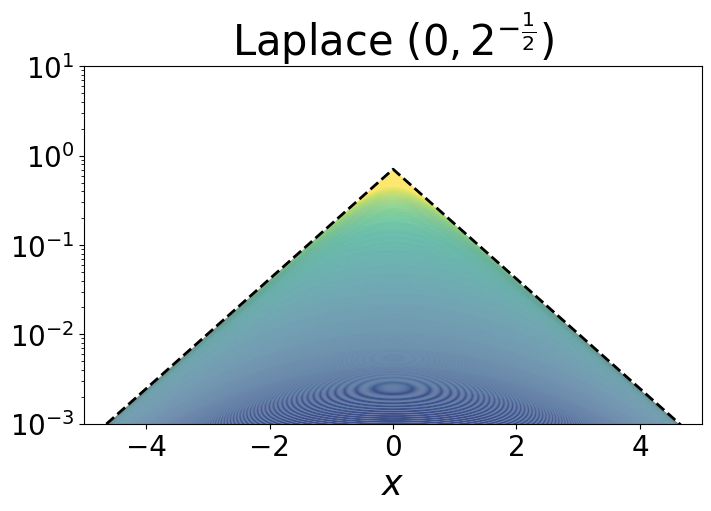

In [10]:
title = r'Laplace ($0, 2^{-\frac{1}{2}}$)' #   , \frac{1}{\sqrt{2}}$)' #, equiv. to' + '\n' +r'Prior ($r=1, \eta=-0.5, \vartheta=1$)'
fig = plot_pdf_components(r=1, eta=-0.5, scale=1, components=NUM_COMPONENTS_SMOOTH, mode="equal", color_fn= color_fn,  xlim=(-5, 5),  log_lim=(1e-3, 10), title= title, debug=True, edgecolor= None)
if SAVE_FIGS:
        save_path = os.path.join(plots_path, f"scale_mixture_smooth_laplace.jpg")
        fig.savefig(save_path, dpi=600, bbox_inches='tight')

# Cauchy

In [11]:
# title = r'Cauchy ($0, \sqrt{2}$), equiv. to Prior ($r=-1, \eta=-2, \vartheta=1$)'
# fig = plot_pdf_components(r=-1, eta=-2, scale=1, components=10, mode="equal", color_fn= color_fn, xlim=(-5, 5),  log_lim=(1e-3, 10), debug=True, prior_pdf=stats.cauchy(0,np.sqrt(2)).pdf, title=title)
# if SAVE_FIGS:
#         save_path = os.path.join(plots_path, f"scale_mixture_cauchy.jpg")
#         fig.savefig(save_path, dpi=600, bbox_inches='tight')

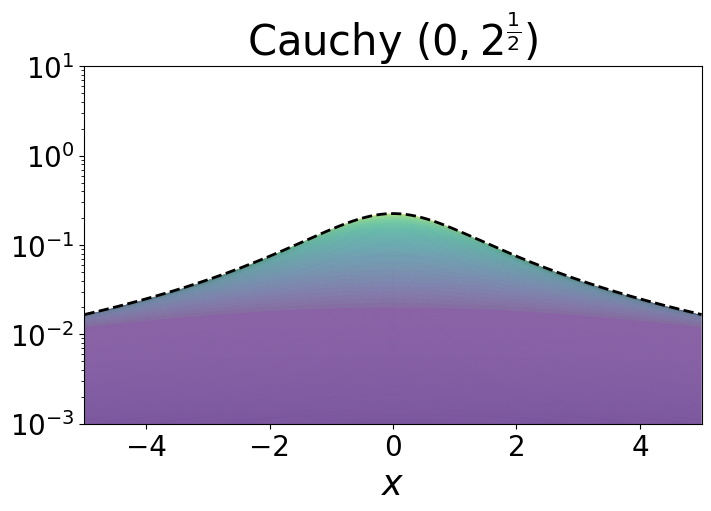

In [12]:
title = r'Cauchy ($0, 2^{\frac{1}{2}}$)' # , equiv. to Prior ($r=-1, \eta=-2, \vartheta=1$)'
fig = plot_pdf_components(r=-1, eta=-2, scale=1, components=NUM_COMPONENTS_SMOOTH, mode="equal", color_fn= color_fn, xlim=(-5, 5),  log_lim=(1e-3, 10), debug=True, prior_pdf=stats.cauchy(0,np.sqrt(2)).pdf, title=title, edgecolor= None)
if SAVE_FIGS:
        save_path = os.path.join(plots_path, f"scale_mixture_smooth_cauchy.jpg")
        fig.savefig(save_path, dpi=600, bbox_inches='tight')

# Student T $\nu = 2$

In [13]:
# title = r'Scale Mixture of Normals with Student T($\nu = 2$)' + f'\nPrior components= 10'
# fig = plot_pdf_components(r=-1, eta=-2.5, scale=1, components=10, mode="equal", color_fn= color_fn, xlim=(-5, 5),  log_lim=(1e-3, 10), title =title, debug=True, prior_pdf=stats.t(df = 2).pdf)
# if SAVE_FIGS:
#         save_path = os.path.join(plots_path, f"scale_mixture_student_t.jpg")
#         fig.savefig(save_path, dpi=600, bbox_inches='tight')

In [14]:
# title = r'Student T($\nu = 2$) Prior'
# fig = plot_pdf_components(r=-1, eta=-2.5, scale=1, components=NUM_COMPONENTS_SMOOTH, mode="equal", color_fn= color_fn, xlim=(-5, 5),  log_lim=(1e-3, 10), title =title, debug=True, prior_pdf=stats.t(df = 2).pdf, edgecolor= None)
# if SAVE_FIGS:
#         save_path = os.path.join(plots_path, f"scale_mixture_smooth_student_t.jpg")
#         fig.savefig(save_path, dpi=600, bbox_inches='tight')

# A

In [15]:
# title = f'Scale Mixture of Normals with GenGamma Prior \nr=.2, eta=2, scale=1, components={10}'
# fig = plot_pdf_components(r=.2, eta=2, scale=1, components=10, xlim = [-5, 5], color_fn= color_fn, log_lim = (1e-6, 10), title =title, mode="equal", debug=True)
# if SAVE_FIGS:
#         save_path = os.path.join(plots_path, f"scale_mixture_r=0.2_eta=2_scale=1.jpg")
#         fig.savefig(save_path, dpi=600, bbox_inches='tight')

Params: 0.2, 2
Chebyshev bound: 52749.500886264315
Tail samples: 200
Maximum Diff in y-values: 0.005828559981145204
First CDF value: 3.8212144969303474e-10
Last CDF value: 0.9999999996178786
Tail bound: 0.001
KstestResult(statistic=0.00513804132503437, pvalue=0.953188348052603, statistic_location=-430.3821076455605, statistic_sign=-1)


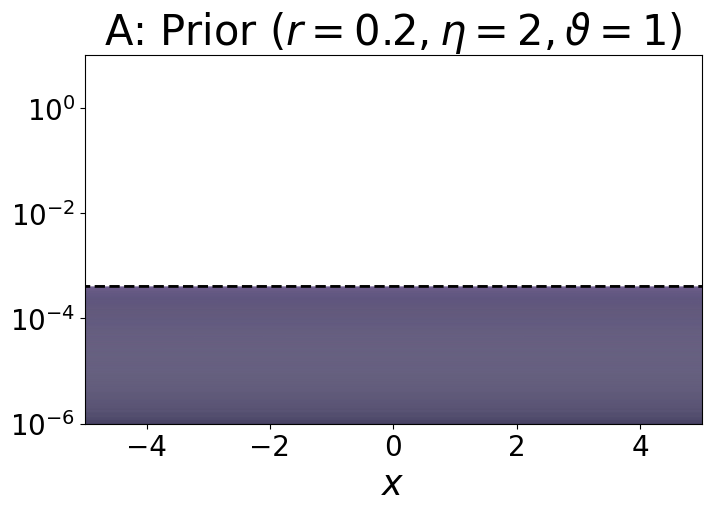

In [16]:
title = r'A: Prior ($r=0.2, \eta=2, \vartheta=1$)'
fig = plot_pdf_components(r=0.2, eta=2, scale=1, components=NUM_COMPONENTS_SMOOTH, xlim = [-5, 5], color_fn= color_fn, log_lim = (1e-6, 10), title = title, mode="equal", debug=True , edgecolor= None)
if SAVE_FIGS:
        save_path = os.path.join(plots_path, f"scale_mixture_smooth_r=0.2_eta=2_scale=1.jpg")
        fig.savefig(save_path, dpi=600, bbox_inches='tight')

# B

In [17]:
# title = f'Scale Mixture of Normals with GenGamma Prior \nr=1, eta=2, scale=1, components={10}'
# fig = plot_pdf_components(r=1, eta=2, scale=1, components=10, mode="equal", color_fn= color_fn, xlim=(-5, 5),  log_lim=(1e-3, 10), debug=True)
# if SAVE_FIGS:
#         save_path = os.path.join(plots_path, f"scale_mixture_r=1_eta=2_scale=1.jpg")
#         fig.savefig(save_path, dpi=600, bbox_inches='tight')

Params: 1, 2
Chebyshev bound: 59.16079783099616
No tail
Maximum Diff in y-values: 0.014213646564758764
First CDF value: 7.884039416526217e-34
Last CDF value: 1.0
Tail bound: 0.001
KstestResult(statistic=0.00815291751484648, pvalue=0.5168232020288734, statistic_location=-0.38254942829645183, statistic_sign=-1)


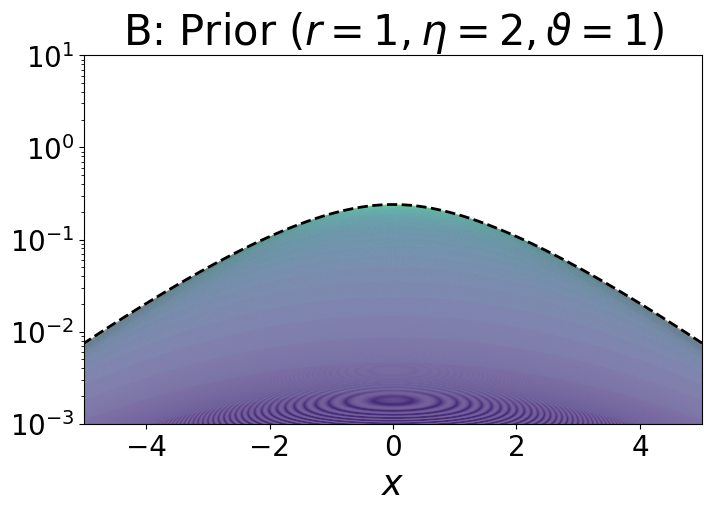

In [18]:
title = r'B: Prior ($r=1, \eta=2, \vartheta=1$)'
fig = plot_pdf_components(r=1, eta=2, scale=1, components=NUM_COMPONENTS_SMOOTH, mode="equal", color_fn= color_fn, xlim=(-5, 5),  log_lim=(1e-3, 10), title= title, debug=True, edgecolor= None)
if SAVE_FIGS:
        save_path = os.path.join(plots_path, f"scale_mixture_smooth_r=1_eta=2_scale=1.jpg")
        fig.savefig(save_path, dpi=600, bbox_inches='tight')

# C

In [19]:
# title = f'Scale Mixture of Normals with GenGamma Prior \nr=1, eta=-1, scale=1, components={10}'
# fig = plot_pdf_components(r=1, eta=-1, scale=1, components=10, mode="equal", color_fn= color_fn, xlim=(-1, 1),  lin_lim= [0, 1.5], log_lim=(1e-3, 10), title = title,  debug=True)
# if SAVE_FIGS:
#         save_path = os.path.join(plots_path, f"scale_mixture_r=1_eta=1_scale=1.jpg")
#         fig.savefig(save_path, dpi=600, bbox_inches='tight')

Params: 1, -1
Chebyshev bound: 22.360679774997898
No tail
Maximum Diff in y-values: 0.04603906744925168
Maximum Diff in y-values with new points: 0.0009957434972748258
First CDF value: 1.2854592126570933e-15
Last CDF value: 0.9999999999999987
Tail bound: 0.001
KstestResult(statistic=0.0069263627749781564, pvalue=0.7207112387600252, statistic_location=0.036771276341619516, statistic_sign=-1)


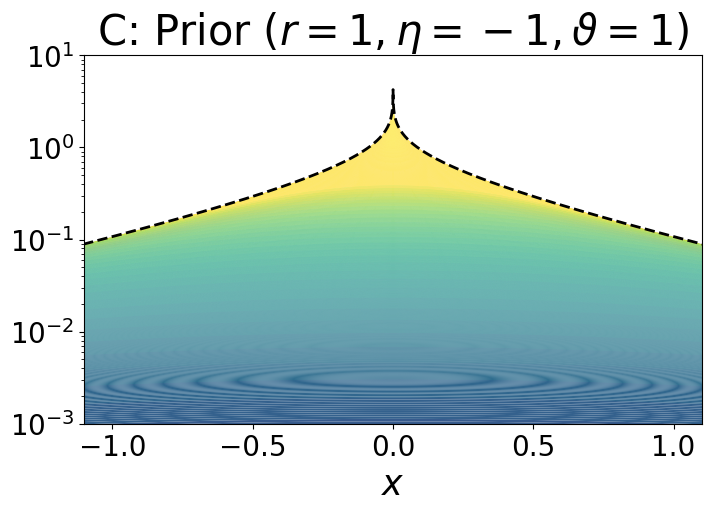

In [20]:
title = r'C: Prior ($r=1, \eta=-1, \vartheta=1$)'
fig = plot_pdf_components(r=1, eta=-1, scale=1, components=NUM_COMPONENTS_SMOOTH, mode="equal", color_fn= color_fn, xlim=(-1.1, 1.1),  log_lim=(1e-3, 10), title = title, debug=True, edgecolor= None) # lin_lim= [0, 1.5], 
if SAVE_FIGS:
        save_path = os.path.join(plots_path, f"scale_mixture_smooth_r=1_eta=1_scale=1.jpg")
        fig.savefig(save_path, dpi=600, bbox_inches='tight')

# D

In [21]:
# title = f'Scale Mixture of Normals with GenGamma Prior \nr=5, eta=5, scale=1, components={10}'
# fig = plot_pdf_components(r=5, eta=5, scale=1, components=10, mode="equal", color_fn= color_fn, title = title, xlim=(-5, 5), log_lim=(1e-3, 10), debug=True)
# if SAVE_FIGS:
#         save_path = os.path.join(plots_path, f"scale_mixture_r=5_eta=5_scale=1.jpg")
#         fig.savefig(save_path, dpi=600, bbox_inches='tight')

Params: 2, 6
Chebyshev bound: 43.28033236489969
No tail
Maximum Diff in y-values: 0.012984158868417084
First CDF value: 8.380435482455836e-80
Last CDF value: 1.0
Tail bound: 0.001
KstestResult(statistic=0.009849660704526308, pvalue=0.2846075230333389, statistic_location=0.6944038475071628, statistic_sign=-1)


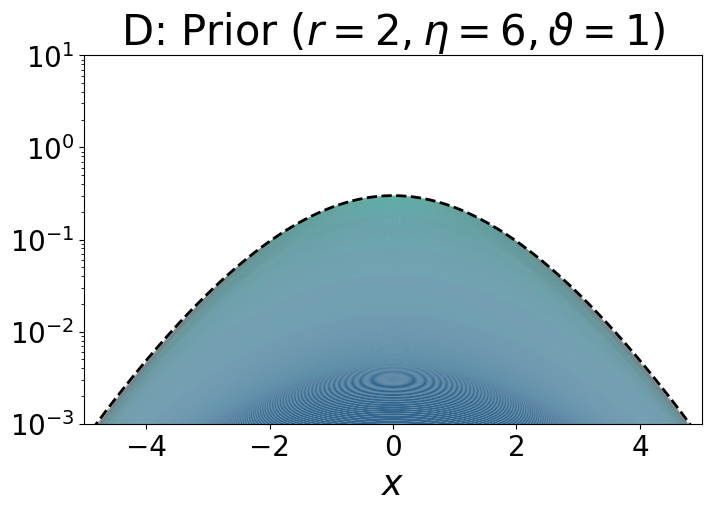

In [22]:
title = r'D: Prior ($r=2, \eta=6, \vartheta=1$)'
fig = plot_pdf_components(r=2, eta=6, scale=1, components=NUM_COMPONENTS_SMOOTH, mode="equal", title = title, color_fn= color_fn, xlim=(-5, 5), log_lim=(1e-3, 10), debug=True, edgecolor= None)
if SAVE_FIGS:
        save_path = os.path.join(plots_path, f"scale_mixture_smooth_r=5_eta=5_scale=1.jpg")
        fig.savefig(save_path, dpi=600, bbox_inches='tight')